# STAT 207 Homework 9 [25 points]

## Linear Model Assumptions & Logistic Models

Due: Friday, April 5, end of day (11:59 pm CT)

<hr>

## Research Question:

For this homework assignment, our first research question of interest is: "Can we accurately predict how long a hospital stay will be for seriously ill patients from its linear relationship with selected other variables in the data?"

---

Our second research question of interest is: "Can we learn about the relationship between level of care required and variables including the age, sex, and comorbidity of the patient?"

## Case Study

A famous study called "SUPPORT" (Study to Understand Prognoses Preferences Outcomes and Risks of Treatment) was conducted to determine what factors affected or predicted outcomes, including how long a patient remained in the hospital.

We will use a random sample of 580 seriously ill hospitalized patients from the SUPPORT study, with the following variables:

- **Days**: day to death or hospital discharge
- **Age**: age on day of hospital admission
- **Sex**: female or male
- **Comorboidity**: patient diagnosed with more than one chronic disease
- **EdYears**: years of education
- **Education**: education level: high or low
- **Income**: income level: high or low
- **Charges**: hospital charges, in dollars
- **Care**: level of care required: high or low
- **Race**: Non-white or white
- **Pressure**: Blood pressure, in mmHg
- **Blood**: white blood cell count, in gm/dL
- **Rate**: heart rate, in bpm

## 1. Imports [1.5 point]

**a)**  Import the packages needed for this assignment:

- pandas
- matplotlib.pyplot
- seaborn
- sklearn for creating training and test data
- sklearn or statsmodels for fitting a linear model

The first package assists in analyzing a dataset.  The second two packages provide support for visualizations.  The fourth package will be used for splitting the data into a training and a test data.  The last package (your choice) will be used for fitting a linear model.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

**b)**  The data is cleaned and in this folder as hospital.csv.  Read this file in.  

In [18]:
df = pd.read_csv('hospital.csv')
print(df.shape)
df.head()

(580, 13)


,Days,Age,Sex,Comorbidity,EdYears,Education,Income,Charges,Care,Race,Pressure,Blood,Rate
0,8,42.258972,female,no,11,low,high,9914.0,low,non-white,84,11.298828,94
1,14,63.662994,female,no,22,high,high,283303.0,high,white,69,30.097656,108
2,21,41.521973,male,yes,18,high,high,320843.0,high,white,66,0.199982,130
3,4,41.959991,male,yes,16,high,high,4173.0,low,white,97,10.798828,88
4,11,52.089996,male,yes,8,low,high,13414.0,low,white,89,6.399414,92


**c)** Create a training and testing dataset for the hospital data.  Use a random state of 674, and put 85% of the observations into the training set with 15% of the observations into the test set.

In [19]:
df_train, df_test = train_test_split(df, test_size = .15, random_state = 674)

## 2. Linear Model of Interest [2 points]

**a)** Fit a linear model to the training data predicting the number of days of the hospital stay based on the age, years of education, white blood count, race, and the interaction of the race with the years of education. 

In [20]:
model = smf.ols('Days ~ Age + EdYears + Blood + Race + Race:EdYears', data = df_train).fit()

**b)** Create a fitted vs. residuals plot for this model.

In [21]:
fitted = model.fittedvalues
residuals = model.resid

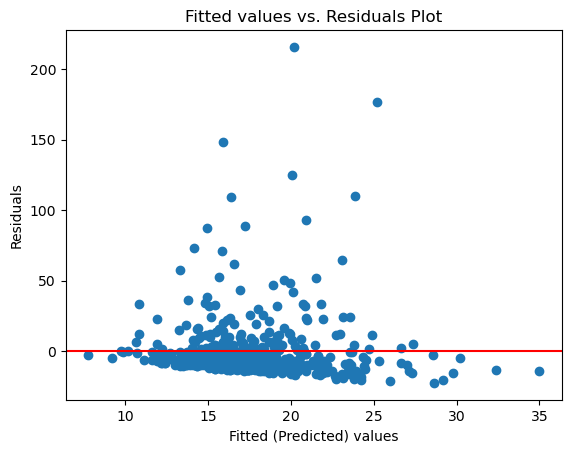

In [22]:
plt.scatter(fitted, residuals)
plt.axhline(y = 0, color = 'r')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

**c)** Generate an appropriate QQ plot for this model.

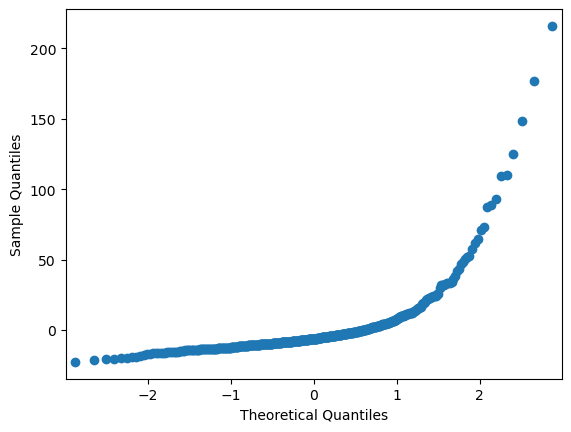

In [23]:
sm.qqplot(residuals)
plt.show()

## 3. Displaying the Linear Model [0.5 points]

Display a summary of the linear model that you fit in Question 2.

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Days   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.454
Date:                Fri, 05 Apr 2024   Prob (F-statistic):             0.0327
Time:                        21:57:28   Log-Likelihood:                -2245.2
No. Observations:                 493   AIC:                             4502.
Df Residuals:                     487   BIC:                             4528.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                18.4304      8.940      2.062      0.040       0.865      35.996
Race[T.white]             3.1126      8.323      0.374      0.709     -13.241      19.466
Age                      -0.1221      0.067     -1.817      0.070      -0.254       0.010
EdYears                  -0.0306      0.615     -0.050      0.960      -1.239       1.178
Race[T.white]:EdYears -3.989e-05      0.691  -5.77e-05      1.000      -1.358       1.358
Blood                     0.3754      0.132      2.844      0.005       0.116       0.635
==============================================================================
Omnibus:                      507.119   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20010.929
Skew:                           4.681   Prob(JB):                         0.00
Kurtosis:                      32.775   Cond. No.                         728.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. A Second Model [1 point]

For this last question, we will respond to the second research question for this assignment.

Fit a logistic model to the training data predicting the level of care required from the age, sex, and comorbidities of the patient.

In [25]:
df.columns

Index(['Days', 'Age', 'Sex', 'Comorbidity', 'EdYears', 'Education', 'Income',
       'Charges', 'Care', 'Race', 'Pressure', 'Blood', 'Rate'],
      dtype='object')

In [26]:
df_train['y'] = df_train['Care'].replace( {'high' : 1, 'low' : 0})

In [27]:
log_model = smf.logit('y ~ Age + Sex + Comorbidity', data = df_train).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.645326
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  493
Model:                          Logit   Df Residuals:                      489
Method:                           MLE   Df Model:                            3
Date:                Fri, 05 Apr 2024   Pseudo R-squ.:                 0.06697
Time:                        21:57:28   Log-Likelihood:                -318.15
converged:                       True   LL-Null:                       -340.98
Covariance Type:            nonrobust   LLR p-value:                 6.658e-10
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8076      0.515      5.449      0.000       1.798       3.817
Sex[T.male]           -0.2900      0.190     -1.525      0.127      -0.663       0.083
Comorbidity[T.yes]    -1.6464      0.354     -4.656      0.000      -2.340      -0.953
Age                   -0.0208      0.006     -3.421      0.001      -0.033      -0.009
======================================================================================
"""

Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 9 Canvas Assignment to submit your notebook to GitHub.